pip install pandas-gbq

In [139]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt
#definir rutas de los directorios
from pathlib import Path
current_dir= Path('.')
project_dir= Path(current_dir).parent
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [140]:
query ="""
SELECT * FROM 
`bigquery-public-data.chicago_taxi_trips.taxi_trips` 
LIMIT 5000
"""
#LIMIT 1000
df=pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,1635cc78e071c55379ba87d3d275a4f21333d213,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:30:00+00:00,2016-09-22 11:45:00+00:00,600,0.8,<NA>,<NA>,<NA>,<NA>,...,0.0,9.25,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
1,1e3168900f8090e1bab555b15210f6ad701af327,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 11:45:00+00:00,2016-09-22 12:00:00+00:00,960,7.6,<NA>,<NA>,<NA>,<NA>,...,0.0,21.50,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
2,c620405438b7bfcc6378f885f6aa56d1b8be9369,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 15:00:00+00:00,2016-09-22 15:45:00+00:00,3000,13.2,<NA>,<NA>,<NA>,<NA>,...,0.0,37.00,Cash,Chicago Independents,NaN,NaN,None,NaN,NaN,None
3,c8b56b9c599580efc1e4ffe36ac36cfb7ea85cbd,d2602cb4eab81d9227cd17a415cec4099309d84ff8520c...,2016-09-22 17:15:00+00:00,2016-09-22 17:45:00+00:00,2220,12.2,<NA>,<NA>,<NA>,<NA>,...,4.5,46.58,Credit Card,Chicago Independents,NaN,NaN,None,NaN,NaN,None
4,c876619a0a2869039533144d7105948e9cfc1951,1158f25979ad78fd3dafc867a540ad761b65922c312e61...,2016-09-19 21:00:00+00:00,2016-09-19 21:30:00+00:00,1560,15.6,<NA>,<NA>,<NA>,<NA>,...,4.0,52.40,Credit Card,Sun Taxi,NaN,NaN,None,NaN,NaN,None


In [38]:
#Trae los campos numericos 
numerics=['int16','int32','int64','float16','float32','float64']
num_df=df.select_dtypes(include=numerics)
num_df.head()


,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,9,6.2,<NA>,<NA>,<NA>,<NA>,4.75,0.0,0.0,0.0,4.75,NaN,NaN,NaN,NaN
1,583,20.0,<NA>,<NA>,<NA>,<NA>,9.00,0.0,0.0,0.0,9.00,NaN,NaN,NaN,NaN
2,827,16.3,<NA>,<NA>,<NA>,<NA>,9.25,0.0,0.0,1.0,10.25,NaN,NaN,NaN,NaN
3,1076,30.5,<NA>,<NA>,<NA>,<NA>,12.50,0.0,0.0,1.0,13.50,NaN,NaN,NaN,NaN
4,7,20.7,<NA>,<NA>,<NA>,<NA>,9.75,0.0,0.0,1.0,10.75,NaN,NaN,NaN,NaN


In [5]:
num_df.describe()
print(num_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip_seconds            5000 non-null   Int64  
 1   trip_miles              5000 non-null   float64
 2   pickup_census_tract     6 non-null      Int64  
 3   dropoff_census_tract    6 non-null      Int64  
 4   pickup_community_area   0 non-null      Int64  
 5   dropoff_community_area  0 non-null      Int64  
 6   fare                    5000 non-null   float64
 7   tips                    5000 non-null   float64
 8   tolls                   4739 non-null   float64
 9   extras                  5000 non-null   float64
 10  trip_total              5000 non-null   float64
 11  pickup_latitude         0 non-null      float64
 12  pickup_longitude        0 non-null      float64
 13  dropoff_latitude        0 non-null      float64
 14  dropoff_longitude       0 non-null      

In [39]:
num_df = pd.DataFrame(num_df, columns=['trip_seconds', 'trip_miles', 'fare','tips','extras','trip_total'])
num_df.head()

,trip_seconds,trip_miles,fare,tips,extras,trip_total
0,9,6.2,4.75,0.0,0.0,4.75
1,583,20.0,9.00,0.0,0.0,9.00
2,827,16.3,9.25,0.0,1.0,10.25
3,1076,30.5,12.50,0.0,1.0,13.50
4,7,20.7,9.75,0.0,1.0,10.75


<AxesSubplot:>

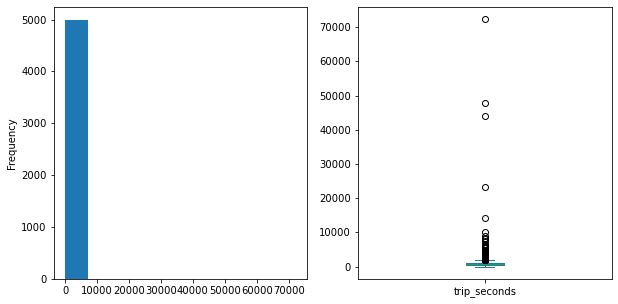

In [40]:
fig, ax= plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
num_df['trip_seconds'].plot(kind='hist', bins=10,ax=ax[0])
num_df['trip_seconds'].plot(kind='box',x=ax[1])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


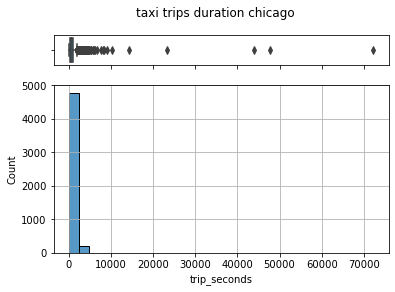

In [41]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_seconds"], ax=ax_box)
sns.histplot(data=num_df, x="trip_seconds", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('taxi trips duration chicago')
ax_hist.grid()


#plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
#f.savefig(plot_path)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

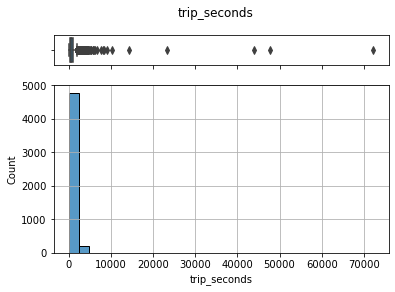

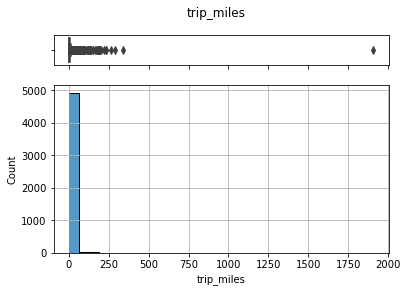

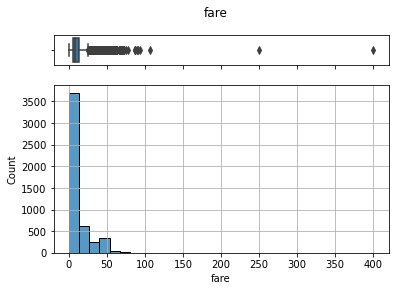

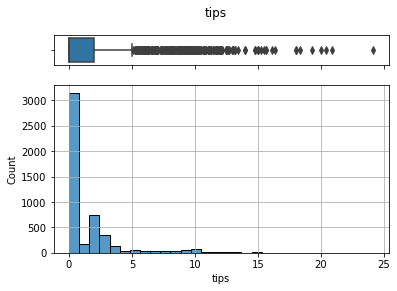

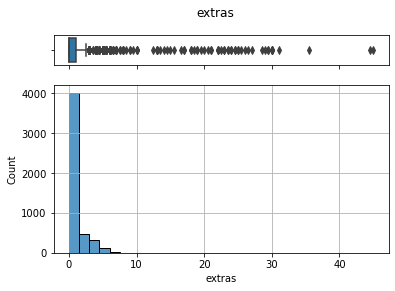

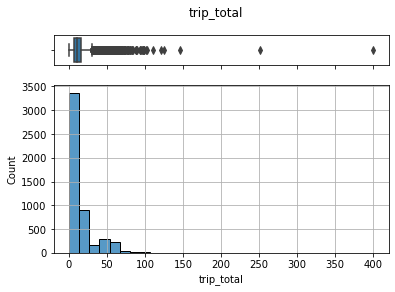

In [75]:
for col in num_df:
            column="{}".format(col)
            f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
            sns.boxplot(num_df[column], ax=ax_box)
            sns.histplot(data=num_df, x=column, bins=30, ax=ax_hist)
            ax_box.set(xlabel='')
            plt.suptitle(column)
            ax_hist.grid()

LOG transform


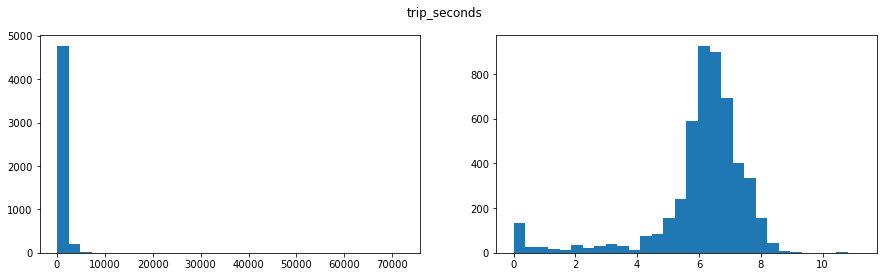

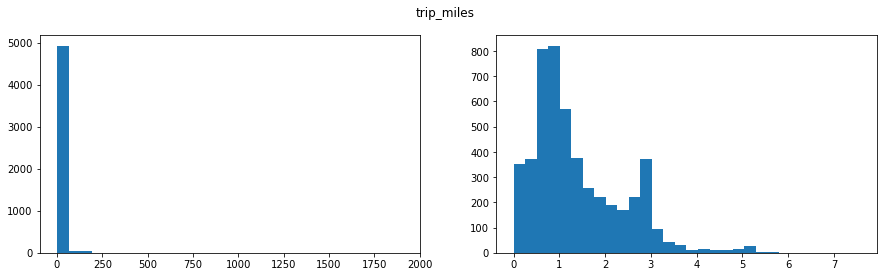

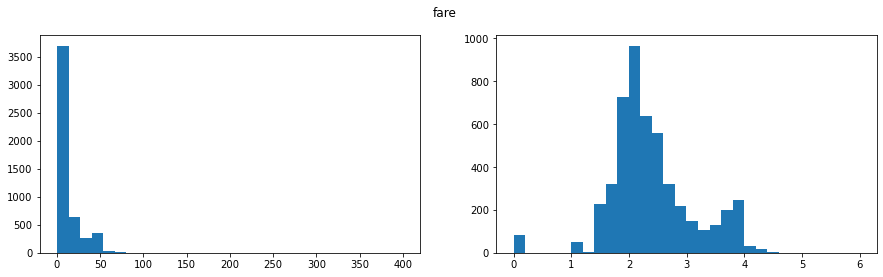

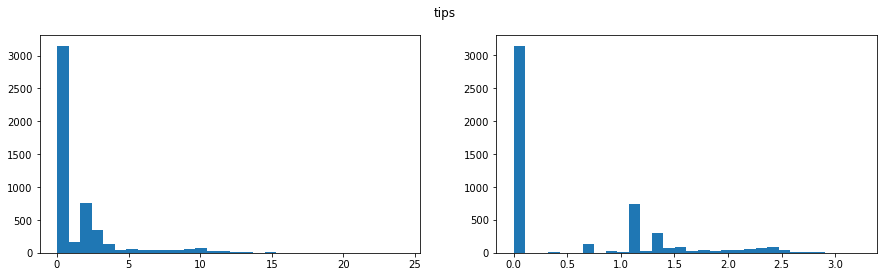

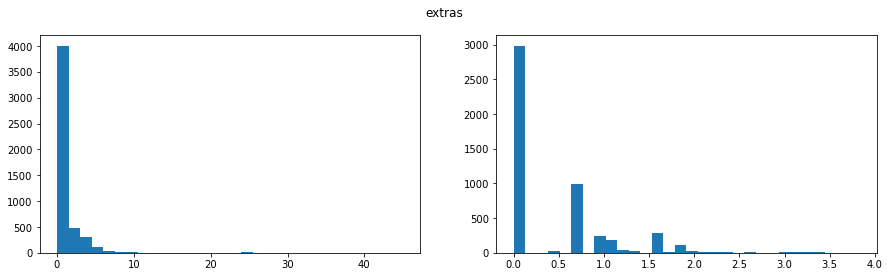

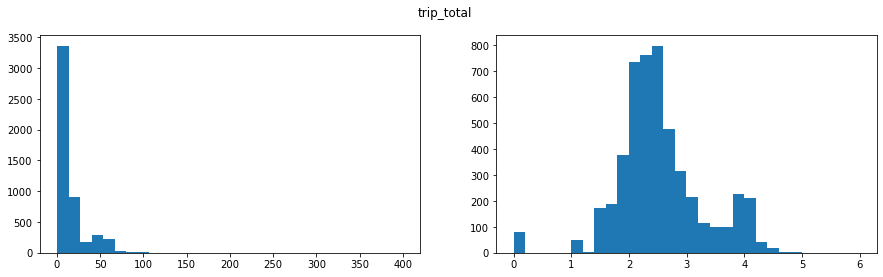

In [74]:
for col in num_df:
    column="{}".format(col)
    x= num_df[column]
    log_x=np.log(x+1)
    f, ax=plt.subplots(1,2, figsize=(15,4))
    ax[0].hist(x, bins=30)
    plt.suptitle(column)
    ax[1].hist(log_x, bins=30);
    

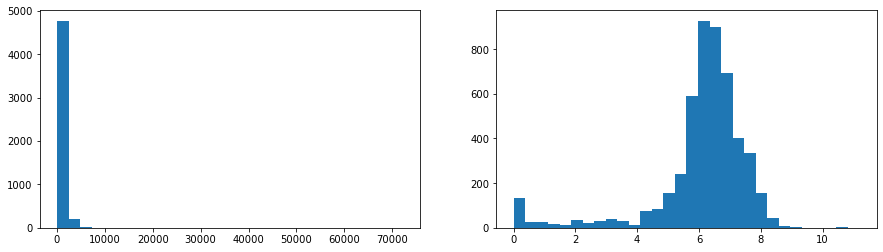

In [51]:
x= num_df['trip_seconds']
log_x=np.log(x+1)
f, ax=plt.subplots(1,2, figsize=(15,4))
ax[0].hist(x, bins=30)
#plt.suptitle(column)
ax[1].hist(log_x, bins=30); #el ; quita los valores solo muestra el grafico

In [53]:
log_x.describe()

count    5000.000000
mean        6.075409
std         1.579593
min         0.000000
25%         5.869297
50%         6.398595
75%         6.867974
max        11.187763
Name: trip_seconds, dtype: float64

In [54]:
log_x.mean()
np.exp(log_x.mean()) #volver al valor inicial con log natural.


435.02738815621484

In [57]:
(num_df[col])

0        4.75
1        9.00
2       10.25
3       13.50
4       10.75
        ...  
4995     7.50
4996     9.25
4997    46.75
4998    62.50
4999     8.00
Name: trip_total, Length: 5000, dtype: float64


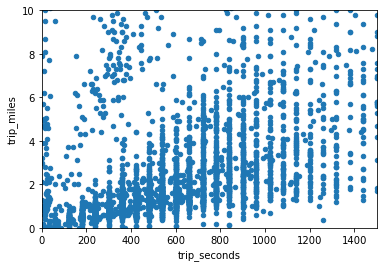

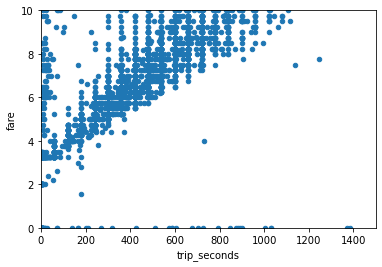

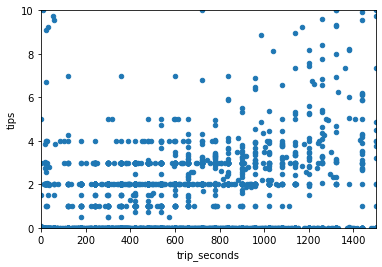

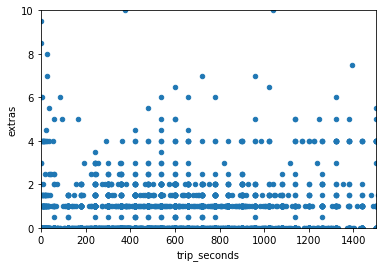

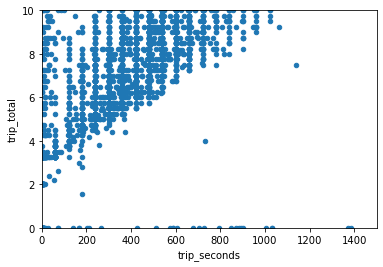

In [37]:
for col in num_df:
    column="{}".format(col)
    if column!='trip_seconds':
        num_df.plot(kind='scatter', x='trip_seconds', y=column)#, alpha=0.1)
        plt.xlim(0,1500)
        plt.ylim(0,10)

(0.0, 10.0)

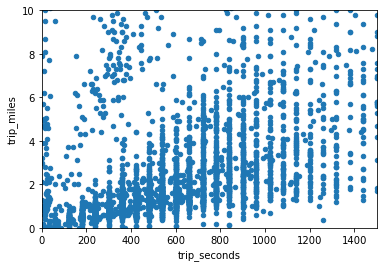

In [23]:
num_df.plot(kind='scatter', x='trip_seconds', y='trip_miles')#, alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,10)
#EL ALFA DIFUMINA PARA VER DONDE SE ESTAN CONCENTRANDO

In [56]:
x='trip_seconds'
y='trip_miles'
num_df[[x, y]].corr()
#CORRELACION DE LAS VARIABLES CUANDO SE ACERCA A UNO ESTAN MAS CORRELACIONADOS

,trip_seconds,trip_miles
trip_seconds,1.000000,0.094474
trip_miles,0.094474,1.000000


In [58]:
num_df.head()

,trip_seconds,trip_miles,fare,tips,extras,trip_total
0,9,6.2,4.75,0.0,0.0,4.75
1,583,20.0,9.00,0.0,0.0,9.00
2,827,16.3,9.25,0.0,1.0,10.25
3,1076,30.5,12.50,0.0,1.0,13.50
4,7,20.7,9.75,0.0,1.0,10.75


<AxesSubplot:xlabel='trip_seconds', ylabel='trip_miles'>

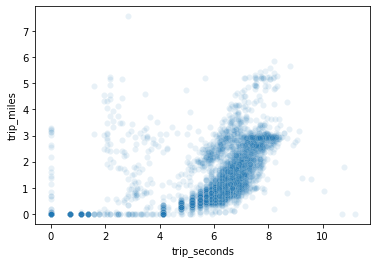

In [60]:
log_x= np.log(num_df[x] +1)
log_y= np.log(num_df[y] +1)
sns.scatterplot(x=log_x, y=log_y, alpha=0.1)

In [61]:
log_num_df = pd.DataFrame(
    columns=[x,y]
)
log_num_df[x]= log_x
log_num_df[y]= log_y
log_num_df.corr()
#con segundos es capaz de describir el 54 % de los datos de y


,trip_seconds,trip_miles
trip_seconds,1.000000,0.475206
trip_miles,0.475206,1.000000


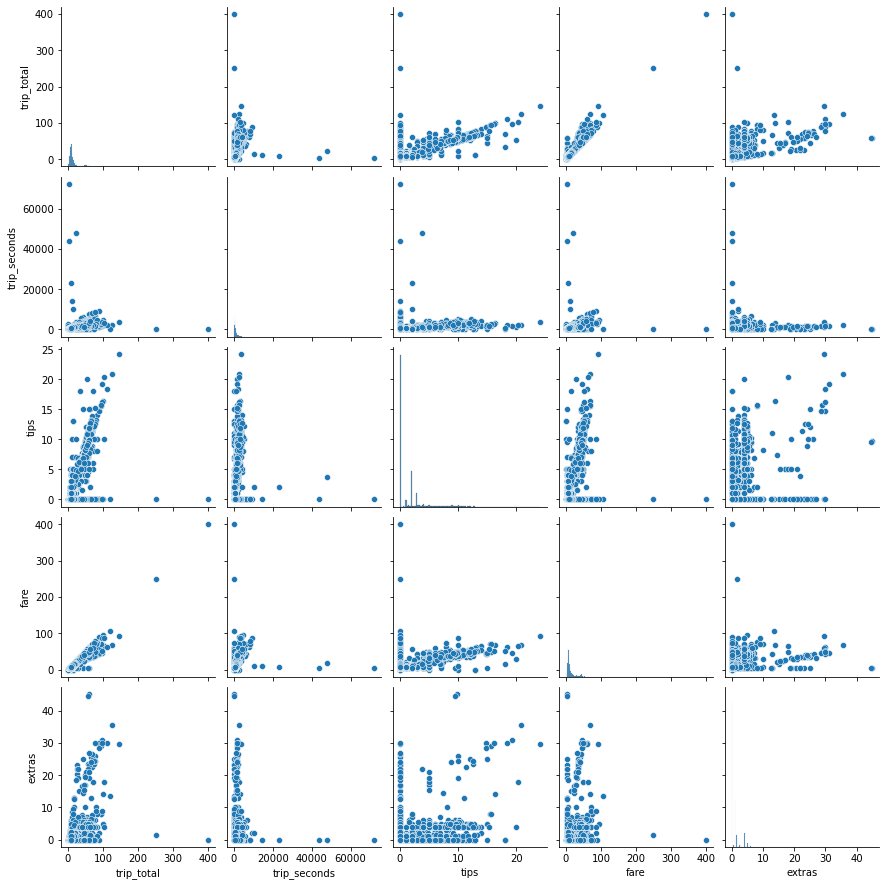

In [62]:
cols=['trip_total','trip_seconds','tips','fare','extras',]
sns.pairplot(data=num_df[cols])

<AxesSubplot:>

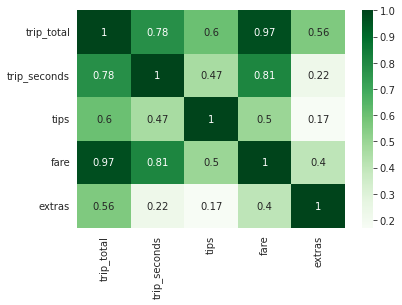

In [53]:
correlations=num_df[cols].corr()
sns.heatmap(correlations, cmap='Greens',annot=True)

In [85]:
num_df.head()

,trip_seconds,trip_miles,fare,tips,extras,trip_total
0,9,6.2,4.75,0.0,0.0,4.75
1,583,20.0,9.00,0.0,0.0,9.00
2,827,16.3,9.25,0.0,1.0,10.25
3,1076,30.5,12.50,0.0,1.0,13.50
4,7,20.7,9.75,0.0,1.0,10.75


Text(0.5, 0.98, 'trip_total')

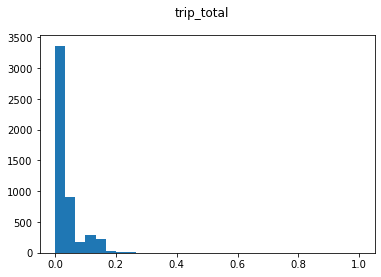

In [105]:
x = num_df['trip_total'] #min-max scaler
x_min=x.min()
x_max=x.max()
x_scaled=(x-x_min)/(x_max - x_min)
plt.hist(x_scaled, bins=30);
plt.suptitle('trip_total')

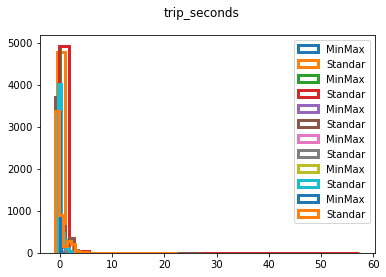

In [138]:
for col in num_df:
    column="{}".format(col)
    x= num_df[column]
    #x = num_df['trip_seconds'] #min-max scaler
    x_min=x.min()
    x_max=x.max()
    x_mean=x.mean()
    x_std=x.std()
    x_scaled=(x-x_min)/(x_max - x_min)
    x_std_scaled=(x-x_mean)/x_std
    plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=3)
    plt.hist(x_std_scaled, bins=30, label='Standar', histtype='step', lw=3)
    plt.legend(loc='upper right')
    plt.suptitle('trip_seconds');

Text(0.5, 0.98, 'trip_seconds')

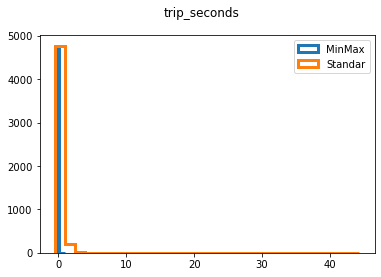

In [131]:
x = num_df['trip_seconds'] #min-max scaler
x_min=x.min()
x_max=x.max()
x_mean=x.mean()
x_std=x.std()
x_scaled=(x-x_min)/(x_max - x_min)
x_std_scaled=(x-x_mean)/x_std
plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=3);
plt.hist(x_std_scaled, bins=30, label='Standar', histtype='step', lw=3);
plt.legend(loc='upper right')
plt.suptitle('trip_seconds')


In [106]:
num_df.head()

,trip_seconds,trip_miles,fare,tips,extras,trip_total
0,9,6.2,4.75,0.0,0.0,4.75
1,583,20.0,9.00,0.0,0.0,9.00
2,827,16.3,9.25,0.0,1.0,10.25
3,1076,30.5,12.50,0.0,1.0,13.50
4,7,20.7,9.75,0.0,1.0,10.75


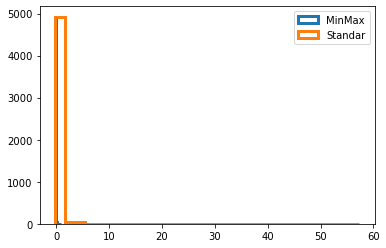

In [125]:
x = num_df['trip_miles'] #min-max scaler
x_min=x.min()
x_max=x.max()
x_mean=x.mean()
x_std=x.std()
x_scaled=(x-x_min)/(x_max - x_min)
x_std_scaled=(x-x_mean)/x_std
plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=3);
plt.hist(x_std_scaled, bins=30, label='Standar', histtype='step', lw=3);
plt.legend(loc='upper right')
plt.suptitle('trip_miles')


Text(0.5, 0.98, 'fare')

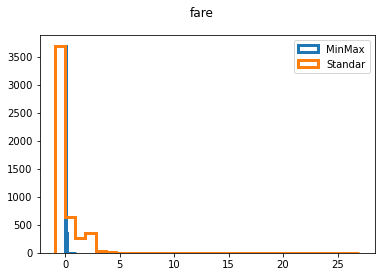

In [132]:
x = num_df['fare'] #min-max scaler
x_min=x.min()
x_max=x.max()
x_mean=x.mean()
x_std=x.std()
x_scaled=(x-x_min)/(x_max - x_min)
x_std_scaled=(x-x_mean)/x_std
plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=3);
plt.hist(x_std_scaled, bins=30, label='Standar', histtype='step', lw=3);
plt.legend(loc='upper right')
plt.suptitle('fare')


Text(0.5, 0.98, 'tips')

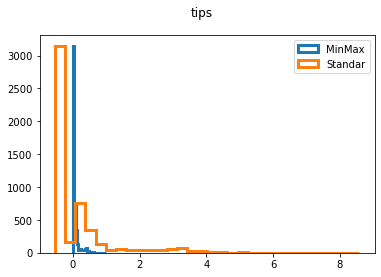

In [133]:
x = num_df['tips'] #min-max scaler
x_min=x.min()
x_max=x.max()
x_mean=x.mean()
x_std=x.std()
x_scaled=(x-x_min)/(x_max - x_min)
x_std_scaled=(x-x_mean)/x_std
plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=3);
plt.hist(x_std_scaled, bins=30, label='Standar', histtype='step', lw=3);
plt.legend(loc='upper right')
plt.suptitle('tips')



Text(0.5, 0.98, 'extras')

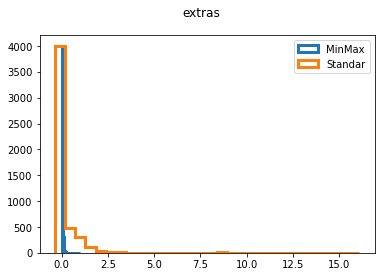

In [134]:
x = num_df['extras'] #min-max scaler
x_min=x.min()
x_max=x.max()
x_mean=x.mean()
x_std=x.std()
x_scaled=(x-x_min)/(x_max - x_min)
x_std_scaled=(x-x_mean)/x_std
plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=3);
plt.hist(x_std_scaled, bins=30, label='Standar', histtype='step', lw=3);
plt.legend(loc='upper right')
plt.suptitle('extras')


Text(0.5, 0.98, 'trip_total')

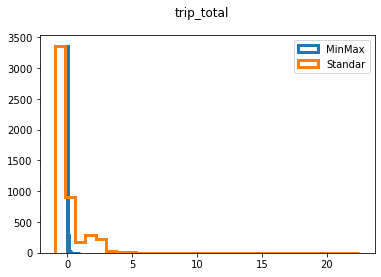

In [135]:
x = num_df['trip_total'] #min-max scaler
x_min=x.min()
x_max=x.max()
x_mean=x.mean()
x_std=x.std()
x_scaled=(x-x_min)/(x_max - x_min)
x_std_scaled=(x-x_mean)/x_std
plt.hist(x_scaled, bins=30, label='MinMax', histtype='step', lw=3);
plt.hist(x_std_scaled, bins=30, label='Standar', histtype='step', lw=3);
plt.legend(loc='upper right')
plt.suptitle('trip_total')

In [129]:
minmax_scaler= MinMaxScaler().fit(num_df[cols])
data_min_max_scaled= minmax_scaler.transform(num_df[cols])
data_min_max_scaled

array([[1.18750000e-02, 1.24584718e-04, 0.00000000e+00, 1.18750000e-02,
        0.00000000e+00],
       [2.25000000e-02, 8.07032115e-03, 0.00000000e+00, 2.25000000e-02,
        0.00000000e+00],
       [2.56250000e-02, 1.14479513e-02, 0.00000000e+00, 2.31250000e-02,
        2.22222222e-02],
       ...,
       [1.16875000e-01, 1.91029900e-02, 2.48447205e-01, 1.00625000e-01,
        0.00000000e+00],
       [1.56250000e-01, 5.98006645e-02, 8.28157350e-02, 1.40000000e-01,
        8.88888889e-02],
       [2.00000000e-02, 6.64451827e-03, 0.00000000e+00, 2.00000000e-02,
        0.00000000e+00]])

In [120]:
np.log(data_min_max_scaled)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([[-4.43331993, -8.99052461,        -inf, -4.43331993,        -inf],
       [-3.79423997, -4.819562  ,        -inf, -3.79423997,        -inf],
       [-3.66418684, -4.46994449,        -inf, -3.766841  , -3.80666249],
       ...,
       [-2.14665029, -3.95791041, -1.39252491, -2.29635454,        -inf],
       [-1.85629799, -2.81673851, -2.4911372 , -1.96611286, -2.42036813],
       [-3.91202301, -5.01396308,        -inf, -3.91202301,        -inf]])